In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/flagellar/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
importlib.reload(fls);

MainProcess
MainProcess


In [2]:
files = glob.glob(fls.result_dir + '/many_abbr_full/Baseline_0M*')
models = [fls.dill_load(f) for f in files]
models = sorted(models, key=lambda d:d.trained_model.seed)

In [3]:
todo = slice(None)
data = copy.deepcopy(models[0].inferred_test_data[todo])

In [4]:
# for m in models[0:1]:
#     m.trained_model.step1Labels.relative_confidence_threshold = 0.001
#     m.inferred_test_data = m.trained_model.infer(m.test_data)

In [5]:
models[0].trained_model.step1Labels.seed

0

In [6]:
model = copy.deepcopy(models[0].untrained_model)
model.step1Labels.relative_confidence_threshold = 0.01
model.step1Labels.preprocessor = flg_preprocess.Preprocessor2()
model.step1Labels.preprocessor.target_voxel_spacing = 20.
model.step1Labels.box_size = 18
model.step1Labels.prevent_ultralytics_resize = True
model.step2Motors.distance_threshold = 10.
model.run_in_parallel = False
model.train(fls.load_all_train_data(), fls.load_all_train_data()[::50])

CompletedProcess(args=['pip', 'uninstall', '-y', 'albumentations'], returncode=0)


  0%|          | 0/644 [00:00<?, ?it/s]

Clearing pytorch


/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


  0%|          | 0/13 [00:00<?, ?it/s]


Preprocessing Complete:
- Training data: 644 tomograms, 0 motors, 0 slices
- Validation data: 13 tomograms, 0 motors, 0 slices
- Dataset directory: /flagellar/temp//yolo_dataset/
- YAML configuration: /flagellar/temp//yolo_dataset/dataset.yaml

Ready for YOLO training!
Starting YOLO training process...
Created new YAML at /flagellar/temp/training.yaml
Using YAML file: /flagellar/temp/training.yaml
YAML contents:
names:
  0: motor
path: /flagellar/temp//yolo_dataset/
train: images/train
val: images/val


Starting YOLO training...
New https://pypi.org/project/ultralytics/8.3.127 available 😃 Update with 'pip install -U ultralytics'
WARNING ⚠️ 'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.126 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=None, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy

train: Scanning /flagellar/temp/yolo_dataset/labels/train... 3511 images, 319 backgrounds, 9 corrupt: 100%|██████████| 3511/3511 [00:01<00:00, 2092.12it/s]

train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0166.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0167.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0168.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0169.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0170.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0171.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/imag

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1686.6±1006.3 MB/s, size: 84.4 KB)


val: Scanning /flagellar/temp/yolo_dataset/labels/val... 69 images, 6 backgrounds, 0 corrupt: 100%|██████████| 69/69 [00:00<00:00, 3191.03it/s]

val: New cache created: /flagellar/temp/yolo_dataset/labels/val.cache


Plotting labels to /flagellar/temp/yolo_weights/motor_detector/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.00046875), 227 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /flagellar/temp/yolo_weights/motor_detector
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.76G      3.147      8.622      1.281         19        640: 100%|██████████| 292/292 [00:31<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.75it/s]

                   all         69         63      0.476      0.518      0.554      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.09G      2.376      1.933      1.047          8        640: 100%|██████████| 292/292 [00:27<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.30it/s]

                   all         69         63      0.834       0.73      0.851      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.09G      2.239      1.783      1.023         19        640: 100%|██████████| 292/292 [00:26<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.72it/s]

                   all         69         63      0.708      0.698      0.724      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.09G      2.138       1.64     0.9968         18        640: 100%|██████████| 292/292 [00:26<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.16it/s]

                   all         69         63      0.959      0.714      0.912      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.09G      2.063      1.579     0.9885         10        640: 100%|██████████| 292/292 [00:25<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.00it/s]

                   all         69         63      0.905      0.903      0.969      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.09G      1.935      1.421     0.9597         16        640: 100%|██████████| 292/292 [00:26<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.75it/s]

                   all         69         63          1      0.911      0.968      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.09G      1.919      1.365      0.961         12        640: 100%|██████████| 292/292 [00:25<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.91it/s]

                   all         69         63      0.989      0.968      0.994       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.09G      1.855      1.291     0.9484         11        640: 100%|██████████| 292/292 [00:26<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.15it/s]

                   all         69         63      0.899      0.984      0.978      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.09G      1.783      1.235      0.935         21        640: 100%|██████████| 292/292 [00:26<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.07it/s]

                   all         69         63      0.968      0.962      0.989      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.09G      1.768      1.242     0.9348          9        640: 100%|██████████| 292/292 [00:26<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.23it/s]

                   all         69         63      0.974      0.921      0.989      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.09G      1.755      1.209     0.9311         18        640: 100%|██████████| 292/292 [00:25<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.95it/s]

                   all         69         63      0.969      0.999      0.994      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.09G      1.686      1.166     0.9146         12        640: 100%|██████████| 292/292 [00:25<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.99it/s]

                   all         69         63          1      0.997      0.995      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.09G      1.645      1.104     0.9112          6        640: 100%|██████████| 292/292 [00:25<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.96it/s]

                   all         69         63      0.998          1      0.995      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.09G      1.674      1.137     0.9101         18        640: 100%|██████████| 292/292 [00:26<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.84it/s]

                   all         69         63      0.997      0.984      0.994      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.09G      1.617      1.065      0.901         16        640: 100%|██████████| 292/292 [00:25<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.98it/s]

                   all         69         63          1      0.967      0.987      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.09G      1.584      1.057     0.8965         18        640: 100%|██████████| 292/292 [00:26<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.05it/s]

                   all         69         63      0.998          1      0.995      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.09G      1.529     0.9967     0.8881         11        640: 100%|██████████| 292/292 [00:25<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.03it/s]

                   all         69         63          1      0.968      0.993      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.09G      1.526     0.9887     0.8888         12        640: 100%|██████████| 292/292 [00:26<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.22it/s]

                   all         69         63          1      0.968      0.992      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.09G      1.462     0.9384     0.8736         14        640: 100%|██████████| 292/292 [00:26<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.66it/s]

                   all         69         63          1      0.981      0.995      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.09G      1.445     0.9376     0.8741         12        640: 100%|██████████| 292/292 [00:26<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.51it/s]

                   all         69         63          1          1      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.09G      1.417     0.9314      0.872         16        640: 100%|██████████| 292/292 [00:26<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.05it/s]

                   all         69         63      0.998      0.984      0.995      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.09G      1.414     0.9182     0.8736         13        640: 100%|██████████| 292/292 [00:25<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.60it/s]

                   all         69         63      0.999          1      0.995      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.09G      1.368     0.8661     0.8668         13        640: 100%|██████████| 292/292 [00:26<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.94it/s]

                   all         69         63      0.999          1      0.995      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.09G      1.366     0.8757     0.8704         21        640: 100%|██████████| 292/292 [00:26<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.89it/s]

                   all         69         63      0.999      0.984      0.995      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.09G      1.363     0.8533     0.8615         16        640: 100%|██████████| 292/292 [00:25<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.72it/s]

                   all         69         63      0.997      0.984      0.995       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.09G      1.303     0.8337      0.855         15        640: 100%|██████████| 292/292 [00:26<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.04it/s]

                   all         69         63      0.998          1      0.995      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.09G      1.282     0.8278     0.8589         11        640: 100%|██████████| 292/292 [00:26<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.30it/s]

                   all         69         63      0.999          1      0.995      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.09G      1.253     0.7914     0.8501         14        640: 100%|██████████| 292/292 [00:26<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.30it/s]

                   all         69         63          1      0.982      0.994      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.09G      1.243     0.7784     0.8515         10        640: 100%|██████████| 292/292 [00:25<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.63it/s]

                   all         69         63      0.999          1      0.995      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.09G       1.21     0.7575     0.8458         20        640: 100%|██████████| 292/292 [00:26<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.49it/s]

                   all         69         63      0.999          1      0.995      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.09G      1.191     0.7487     0.8412         16        640: 100%|██████████| 292/292 [00:26<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.44it/s]

                   all         69         63          1      0.999      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.09G      1.187     0.7336      0.844         13        640: 100%|██████████| 292/292 [00:26<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.44it/s]

                   all         69         63          1          1      0.995      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.09G      1.143     0.7203     0.8415         16        640: 100%|██████████| 292/292 [00:26<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.64it/s]

                   all         69         63      0.999          1      0.995      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.09G      1.137     0.7013     0.8376         15        640: 100%|██████████| 292/292 [00:26<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.88it/s]

                   all         69         63      0.999          1      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.09G      1.108     0.6851     0.8375         19        640: 100%|██████████| 292/292 [00:25<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.95it/s]

                   all         69         63      0.999          1      0.995      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.09G       1.12     0.6755     0.8393         11        640: 100%|██████████| 292/292 [00:26<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.57it/s]

                   all         69         63      0.999          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.09G      1.074     0.6599     0.8299         21        640: 100%|██████████| 292/292 [00:25<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.88it/s]

                   all         69         63      0.999          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.09G      1.065     0.6661     0.8345         14        640: 100%|██████████| 292/292 [00:26<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.72it/s]

                   all         69         63      0.999          1      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.09G      1.063     0.6554     0.8303         13        640: 100%|██████████| 292/292 [00:26<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.59it/s]

                   all         69         63      0.999          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.09G      1.041     0.6521     0.8276         15        640: 100%|██████████| 292/292 [00:26<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.06it/s]

                   all         69         63      0.999          1      0.995      0.827


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.09G     0.7783     0.4273     0.8045          8        640: 100%|██████████| 292/292 [00:26<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.77it/s]

                   all         69         63      0.999          1      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.09G     0.7421     0.4072     0.7984          6        640: 100%|██████████| 292/292 [00:26<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.98it/s]

                   all         69         63      0.999          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.09G     0.7181     0.3964      0.797         10        640: 100%|██████████| 292/292 [00:26<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.96it/s]

                   all         69         63      0.999          1      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.09G     0.6949     0.3851      0.798         10        640: 100%|██████████| 292/292 [00:26<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.98it/s]

                   all         69         63      0.999          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.09G     0.6844     0.3815     0.7993          9        640: 100%|██████████| 292/292 [00:26<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.47it/s]

                   all         69         63      0.999          1      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.09G     0.6683     0.3814     0.7946          9        640: 100%|██████████| 292/292 [00:25<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 16.86it/s]

                   all         69         63      0.999          1      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.09G     0.6629      0.373     0.8007          8        640: 100%|██████████| 292/292 [00:25<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.08it/s]

                   all         69         63      0.999          1      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.09G     0.6664     0.3717     0.7925          9        640: 100%|██████████| 292/292 [00:26<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.97it/s]

                   all         69         63      0.999          1      0.995      0.831
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 38, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



48 epochs completed in 0.360 hours.
Optimizer stripped from /flagellar/temp/yolo_weights/motor_detector/weights/last.pt, 15.2MB
Optimizer stripped from /flagellar/temp/yolo_weights/motor_detector/weights/best.pt, 15.2MB

Validating /flagellar/temp/yolo_weights/motor_detector/weights/best.pt...
Ultralytics 8.3.126 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.79it/s]


                   all         69         63      0.999          1      0.995      0.747
Speed: 0.1ms preprocess, 7.3ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /flagellar/temp/yolo_weights/motor_detector

Training complete!


In [7]:
test_data = fls.load_all_train_data()
inferred_data = model.infer(test_data)
fls.mark_tf_pn(inferred_data, test_data)
fls.dill_save(fls.temp_dir + 'false_positive_data.pickle', inferred_data)

Clearing cupy
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
Processing tomogram tomo_003acc (1/1)
Processing 500 out of 500 slices (CONCENTRATION=1)
FINAL
       z     y     x  confidence
0    104   638   774    0.609375
1     79  1112   915    0.466797
2     80   632   798    0.464844
3     52    36   912    0.441650
4    156   925   775    0.389648
..   ...   ...   ...         ...
109  177   622   728    0.006798
110  269  1665  1175    0.006691
111   64   610   818    0.006615
112   84   903   831    0.006168
113   84   425   797    0.006145

[114 rows x 4 columns]

tomo_003acc total infer time: 9.0043203830719
Clearing pytorch
Clearing cupy
Processing tomogram tomo_00e047 (1/1)
Processing 300 out of 300 slices (CONCENTRATION=1)
FINAL
      z    y    x  confidence
0   167  546  603    0.849121
1    48  323  114    0.246582
2    61  674  396    0.157104
3    61  279   99    0.151489
4   104  521  622    0.112427
5   108  333   65    0.112000
6   

In [9]:
inferred_data[0].labels_unfiltered

,z,y,x,confidence,tf_pn
0,104,638,774,0.609375,1.0
1,79,1112,915,0.466797,1.0
2,80,632,798,0.464844,1.0
3,52,36,912,0.441650,1.0
4,156,925,775,0.389648,1.0
...,...,...,...,...,...
109,177,622,728,0.006798,1.0
110,269,1665,1175,0.006691,1.0
111,64,610,818,0.006615,1.0
112,84,903,831,0.006168,1.0


In [29]:
import pandas as pd
thresh = 0.01
to_merge = []
for d in inferred_data:
    dd = copy.deepcopy(d.labels_unfiltered[np.logical_and(d.labels_unfiltered['confidence']>thresh, d.labels_unfiltered['tf_pn']==1.)])
    dd['name'] = d.name
    to_merge.append(dd)
merged = pd.concat(to_merge, axis=0, ignore_index=True)
merged = merged.sort_values('confidence', ascending=False).reset_index()
del merged['index']
del merged['tf_pn']

In [38]:
fls.dill_save(fls.code_dir + '/neg_labels.pickle', merged)
merged

,z,y,x,confidence,name
0,161,645,321,0.872559,tomo_974fd4
1,155,599,571,0.865234,tomo_d0699e
2,155,651,744,0.864258,tomo_e72e60
3,352,455,478,0.863281,tomo_e2da77
4,208,681,381,0.863281,tomo_9ae65f
...,...,...,...,...,...
20396,91,218,186,0.010010,tomo_4469a7
20397,193,76,21,0.010010,tomo_db6051
20398,216,36,55,0.010010,tomo_7fa3b1
20399,385,542,559,0.010010,tomo_10a3bd


KeyboardInterrupt: 

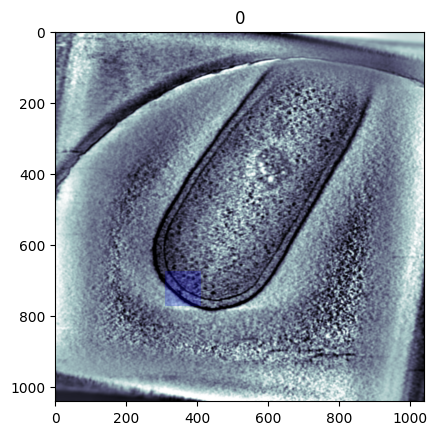

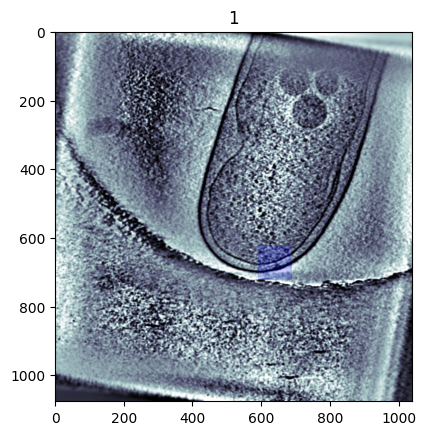

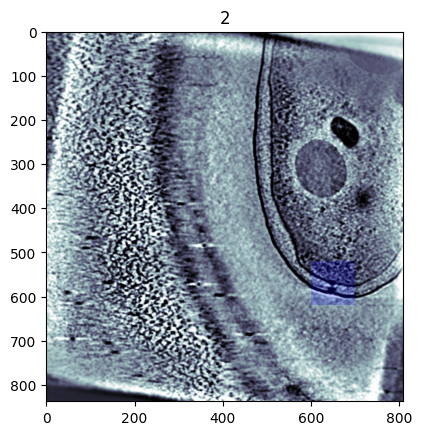

In [17]:
import matplotlib
neg_labels = fls.dill_load(fls.code_dir + '/neg_labels.pickle')
data = fls.load_all_train_data()
sizes = [5]
preprocessor = flg_preprocess.Preprocessor2()
for i_row in range(100):    
    name = neg_labels['name'][i_row]
    for d in data:
        if d.name == name:
            break
    else:
        raise 'Not found'
    dd = copy.deepcopy(d)
    coords = np.array((np.round(neg_labels['z'][i_row]).astype(int), np.round(neg_labels['y'][i_row]).astype(int), np.round(neg_labels['x'][i_row]).astype(int)))
    desired_slices = np.arange(coords[0]-sizes[0], coords[0]+sizes[0]+1)
    desired_slices = desired_slices[desired_slices>=0]
    desired_slices = desired_slices[desired_slices<dd.data_shape[0]]
    preprocessor.load_and_preprocess(dd, desired_original_slices=list(desired_slices))
    coords[0] = len(dd.slices_present)//2
    coords[1] = np.round(coords[1]*dd.resize_factor).astype(int)
    coords[2] = np.round(coords[2]*dd.resize_factor).astype(int)
    plt.figure()
    plt.imshow(np.mean(dd.data,axis=0), cmap='bone')
    x1 = coords[2]-50
    x2 = coords[2]+50
    y1 = coords[1]-50
    y2 = coords[1]+50
    plt.gca().add_patch(matplotlib.patches.Rectangle((x1,y1), x2-x1,y2-y1, alpha=0.2, facecolor='blue'))
    plt.title(str(i_row))

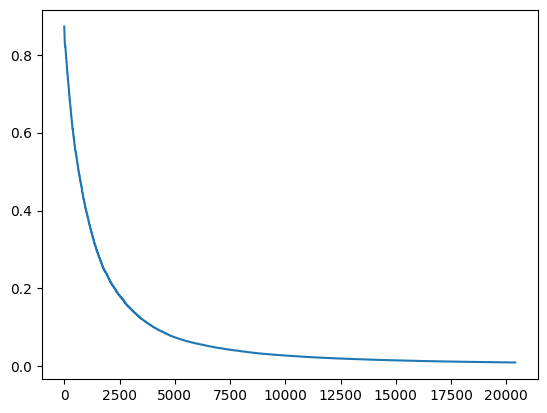

In [12]:
plt.plot(fls.dill_load(fls.code_dir + 'neg_labels.pickle')['confidence'])

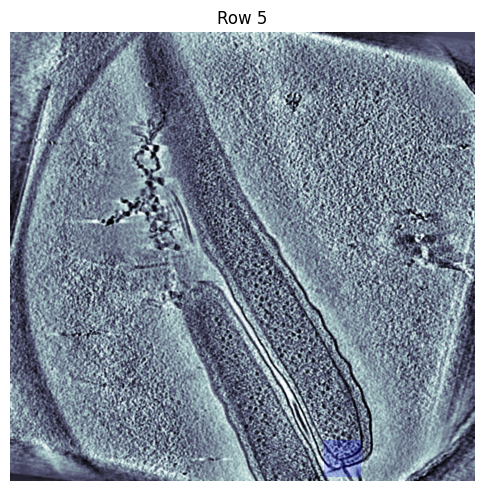

KeyboardInterrupt: Interrupted by user

In [18]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output, display

neg_labels   = fls.dill_load(fls.code_dir + '/neg_labels.pickle')
data         = fls.load_all_train_data()
sizes        = [5]
preprocessor = flg_preprocess.Preprocessor2()

# Create one figure & axes up front
fig, ax = plt.subplots(figsize=(6,6))

decisions = []

for i_row in range(100):
    name = neg_labels['name'][i_row]
    for d in data:
        if d.name == name:
            break
    else:
        raise 'Not found'
    dd = copy.deepcopy(d)
    coords = np.array((np.round(neg_labels['z'][i_row]).astype(int), np.round(neg_labels['y'][i_row]).astype(int), np.round(neg_labels['x'][i_row]).astype(int)))
    desired_slices = np.arange(coords[0]-sizes[0], coords[0]+sizes[0]+1)
    desired_slices = desired_slices[desired_slices>=0]
    desired_slices = desired_slices[desired_slices<dd.data_shape[0]]
    preprocessor.load_and_preprocess(dd, desired_original_slices=list(desired_slices))
    coords[0] = len(dd.slices_present)//2
    coords[1] = np.round(coords[1]*dd.resize_factor).astype(int)
    coords[2] = np.round(coords[2]*dd.resize_factor).astype(int)

    # Clear previous output & axes
    clear_output(wait=True)
    ax.clear()

    # Draw image + rectangle
    img = np.mean(dd.data, axis=0)
    ax.imshow(img, cmap='bone')
    x1, x2 = coords[2] - 50, coords[2] + 50
    y1, y2 = coords[1] - 50, coords[1] + 50
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1,
                              alpha=0.2, facecolor='blue')
    ax.add_patch(rect)
    ax.set_title(f"Row {i_row}")
    ax.axis('off')

    # Display the figure in the cell
    display(fig)
    plt.pause(0.001)   # let the frontend catch up

    # Now get your user input
    decision = input(f"Row {i_row}: keep this? (y/n) ")
    decisions.append(decision.strip().lower())

# (Optional) after loop you can keep the last figure up:
clear_output(wait=True)
display(fig)

In [19]:
decisions

['y', 'y', 'y', 'y', 'y']